In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('dados/card_transdata.tar.gz')

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.shape

(1000000, 8)

In [5]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [6]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
print(f'Total: {len(df)}')
print(f'Okay: {len(df[df["fraud"] == 0])}')
print(f'Fraud: {len(df[df["fraud"] == 1])}')

Total: 1000000
Okay: 912597
Fraud: 87403


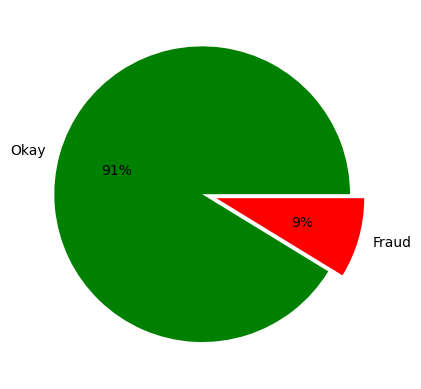

In [8]:
plt.pie(df['fraud'].value_counts(), autopct='%.0f%%', explode=(0, 0.1),
        colors=('g', 'r'), labels=['Okay', 'Fraud'])
plt.show()

In [9]:
df_fraud = df[df['fraud'] == 1]

In [10]:
df_fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0


In [11]:
df_fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000
fraud,87403.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


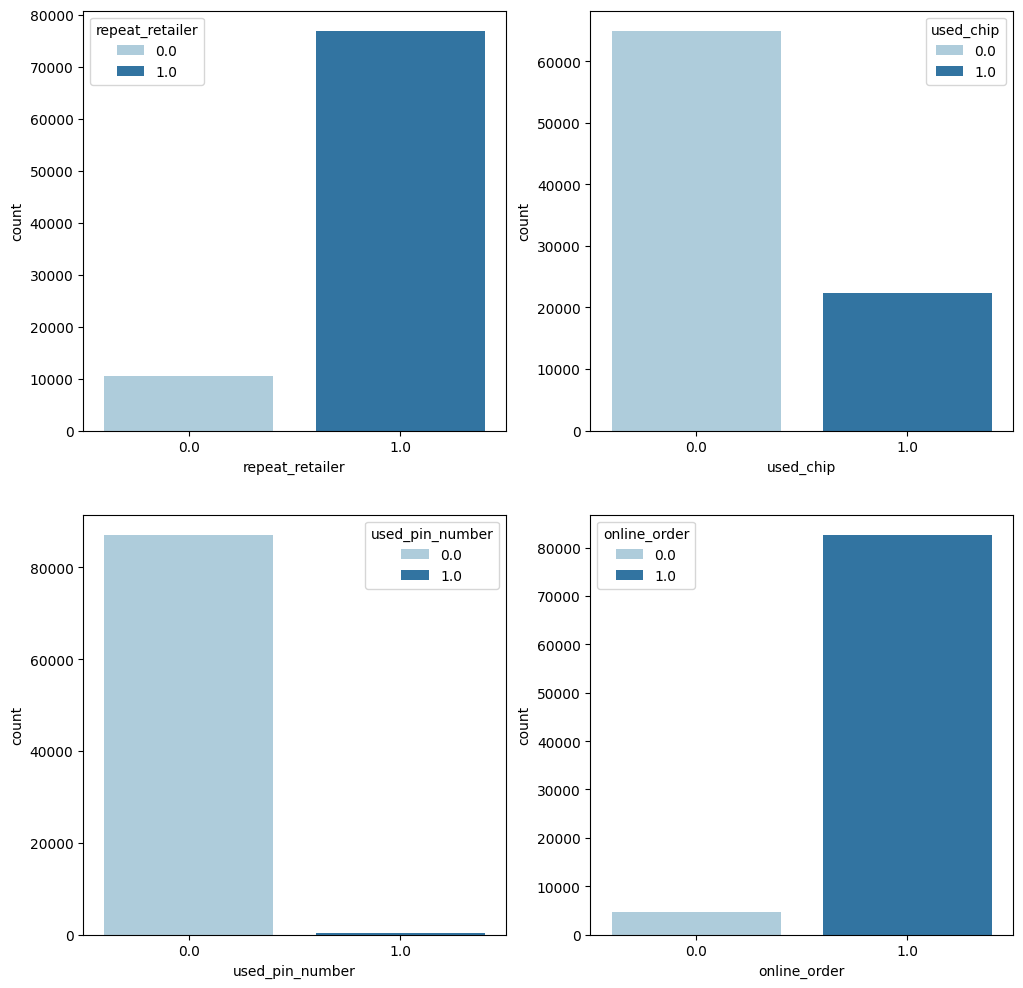

In [12]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='repeat_retailer', palette='Paired', hue='repeat_retailer',
              data=df_fraud)

plt.subplot(2, 2, 2)
sns.countplot(x='used_chip', palette='Paired', hue='used_chip', data=df_fraud)

plt.subplot(2, 2, 3)
sns.countplot(x='used_pin_number', palette='Paired', hue='used_pin_number',
              data=df_fraud)

plt.subplot(2, 2, 4)
sns.countplot(x='online_order', palette='Paired', hue='online_order',
              data=df_fraud)

plt.show()

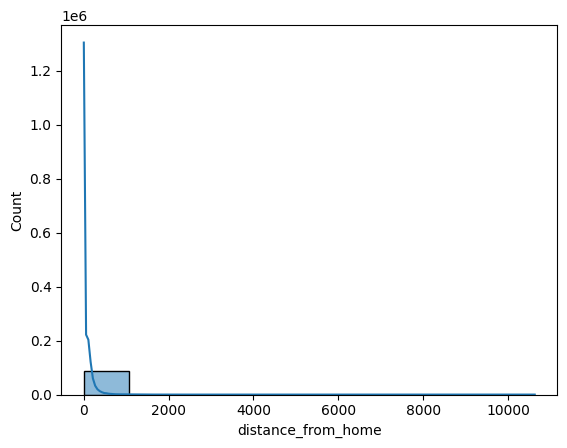

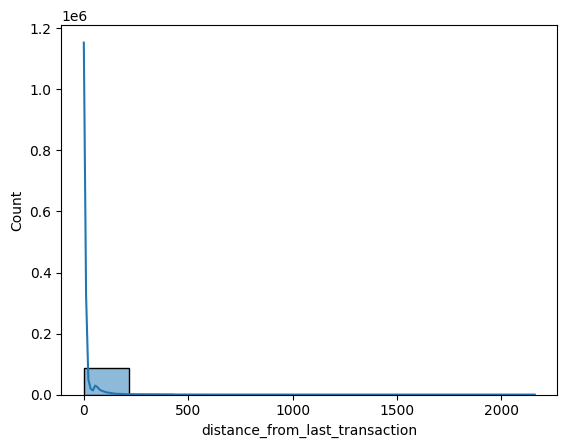

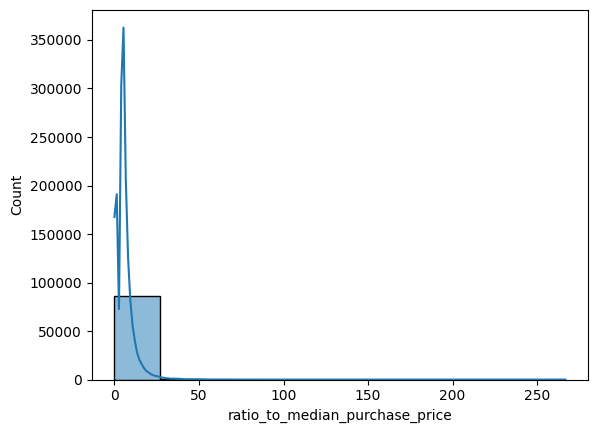

In [13]:
numeric_feats = ['distance_from_home', 'distance_from_last_transaction',
                 'ratio_to_median_purchase_price']

for feat in numeric_feats:
    plt.figure()
    sns.histplot(df_fraud[feat], bins=10, kde=True)
    plt.show()

In [14]:
df_fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0


In [15]:
for feat in numeric_feats:
    df_fraud[feat + '_log'] = np.log10(df_fraud[feat])

/var/folders/zz/1_jbmcqj7632pxx3jmyx4gd40000gn/T/ipykernel_3932/3160231421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud[feat + '_log'] = np.log10(df_fraud[feat])
/var/folders/zz/1_jbmcqj7632pxx3jmyx4gd40000gn/T/ipykernel_3932/3160231421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fraud[feat + '_log'] = np.log10(df_fraud[feat])
/var/folders/zz/1_jbmcqj7632pxx3jmyx4gd40000gn/T/ipykernel_3932/3160231421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

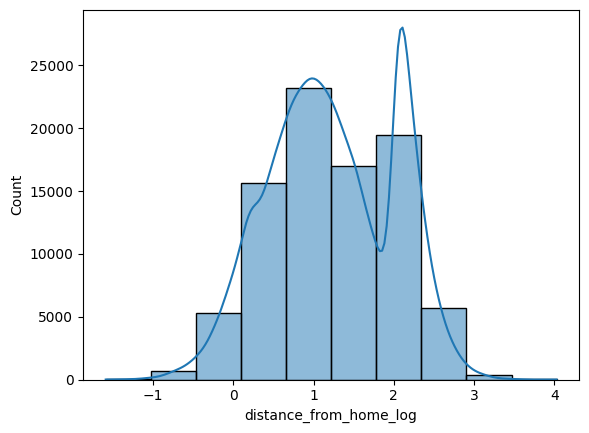

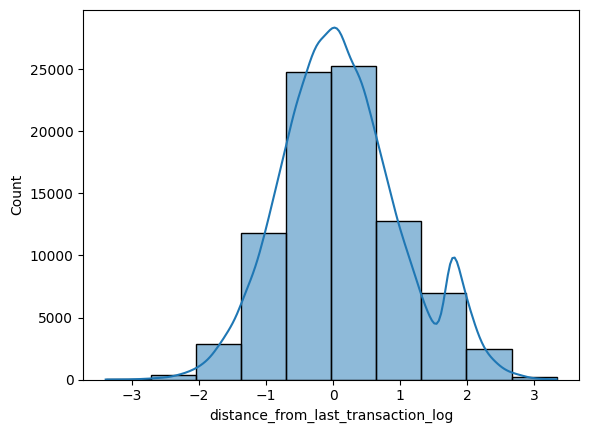

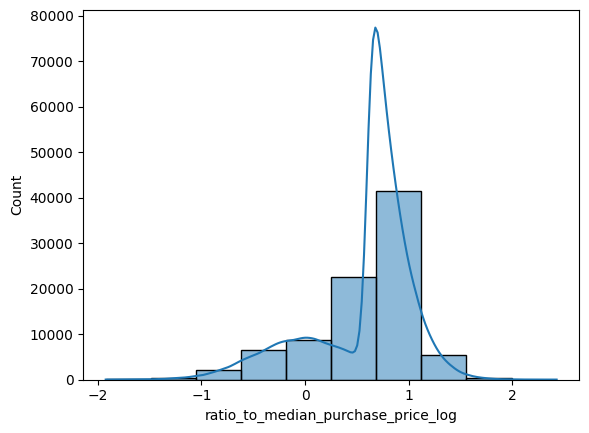

In [16]:
numeric_feats_log = ['distance_from_home_log',
                     'distance_from_last_transaction_log',
                     'ratio_to_median_purchase_price_log']

for feat in numeric_feats_log:
    plt.figure()
    sns.histplot(df_fraud[feat], bins=10, kde=True)
    plt.show()

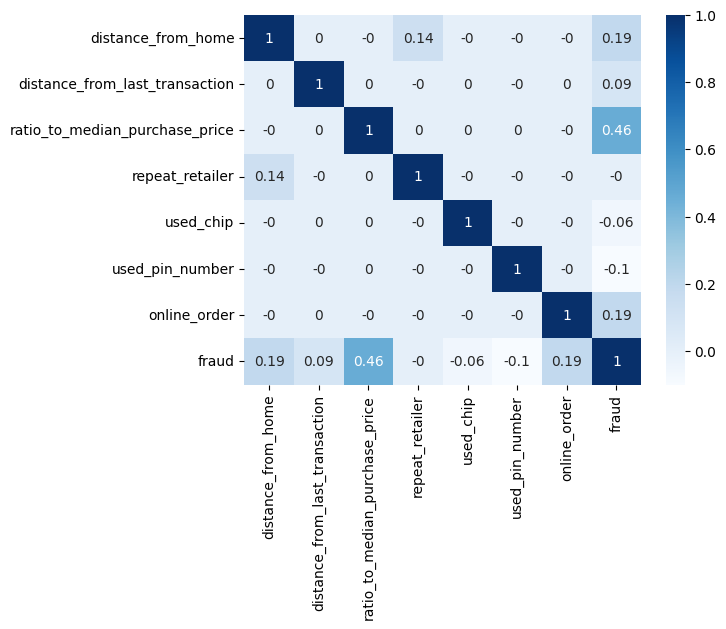

In [17]:
sns.heatmap(data=df.corr().round(2), annot=True, cmap='Blues')
plt.show()

In [18]:
X = df[['distance_from_home', 'ratio_to_median_purchase_price',
        'online_order']]
y = df['fraud']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=7)

In [20]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [21]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
error = []
for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test)
    error.append(np.mean(y_pred != y_test))

/Users/edupmon/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/edupmon/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/edupmon/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/edupmon/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/edupmon/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/Users/edupmon/Library/Python/3.9/lib/python/site-packa

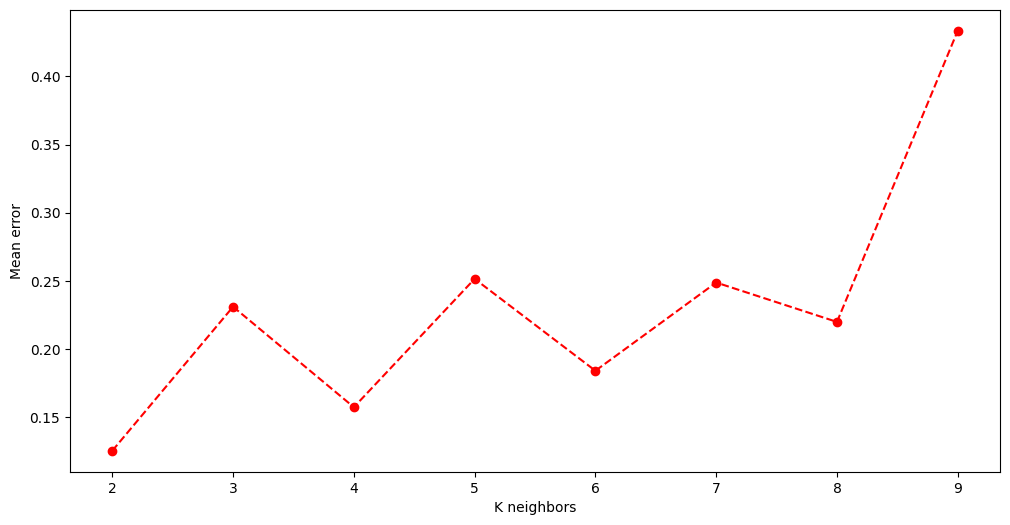

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), error, color='r', linestyle='--', marker='o')
plt.ylabel('Mean error')
plt.xlabel('K neighbors')
plt.show()

In [24]:
knn = KNeighborsClassifier(n_neighbors=5)

In [25]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(X_test_scaled)

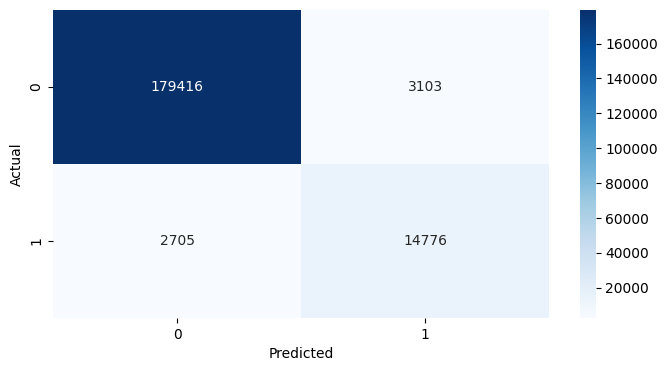

In [27]:
plt.figure(figsize=(8, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98    182519
         1.0       0.83      0.85      0.84     17481

    accuracy                           0.97    200000
   macro avg       0.91      0.91      0.91    200000
weighted avg       0.97      0.97      0.97    200000

